In [55]:
# Creating a DataFrame from the provided data
data_MC = {
    "K8s": {
        "avg_cpu": 0.05246514804523356,
        "stddev_cpu": 0.00022955674968824815,
        "avg_mem": 62.30247395515442,  # Converted to megabytes
        "stddev_mem": None
    },
    "ricplt": {
        "avg_cpu": 0.04366757266714815,
        "stddev_cpu": 0.00039710652044135417,
        "avg_mem": 137.2447620677948,  # Converted to megabytes
        "stddev_mem": None
    },
    "ricxapp": {
        "avg_cpu": 0.0008900663953866055,
        "stddev_cpu": 0.004358119827541142,
        "avg_mem": 74.9453125,  # Converted to megabytes
        "stddev_mem": None
    }
}


data_MD = {
    "K8s": {
        "avg_cpu_node1": 0.052854249512496336,
        "stddev_cpu_node1": 0.0005913149296355842,
        "avg_mem_node1": 62.97903645515442,  # Converted to megabytes
        "stddev_mem_node1": None,
        "avg_cpu_nodeN": 0.019514768921158113,
        "stddev_cpu_nodeN": 0.0011570768088929701,
        "avg_mem_nodeN": 35.46510416030884,  # Converted to megabytes
        "stddev_mem_nodeN": None
    },
    "ricplt": {
        "avg_cpu_node1": 0.041971579282019465,
        "stddev_cpu_node1": 0.0016815453999193802,
        "avg_mem_node1": 133.27572407722474,  # Converted to megabytes
        "stddev_mem_node1": None,
        "avg_cpu_nodeN": 0.0014887758669157424,
        "stddev_cpu_nodeN": 0.00010995452860314736,
        "avg_mem_nodeN": 17.143880205154417,  # Converted to megabytes
        "stddev_mem_nodeN": None
    },
    "ricxapp": {
        "avg_cpu_node1": 0.0004300343993390507,
        "stddev_cpu_node1": 0.00008038639962301168,
        "avg_mem_node1": 9.1796875,  # Converted to megabytes
        "stddev_mem_node1": None,
        "avg_cpu_nodeN": None,
        "stddev_cpu_nodeN": None,
        "avg_mem_nodeN": None,
        "stddev_mem_nodeN": None
    }
}


data_DIS = {
    "K8s": {
        "avg_cpu_node1": 0.05244848346243779,
        "stddev_cpu_node1": 0.00026829243173704954,
        "avg_mem_node1": 63.14596353530884,  # Converted to megabytes
        "stddev_mem_node1": None,
        "avg_cpu_nodeN": 0.019628694217122957,
        "stddev_cpu_nodeN": 0.00018646931087476867,
        "avg_mem_nodeN": 37.46510416030884,  # Converted to megabytes
        "stddev_mem_nodeN": None
    },
    "ricplt": {
        "avg_cpu_node1": 0.04930786073216015,
        "stddev_cpu_node1": 0.0005128092908128262,
        "avg_mem_node1": 155.72861841201782,  # Converted to megabytes
        "stddev_mem_node1": None,
        "avg_cpu_nodeN": 0.0031126381889326113,
        "stddev_cpu_nodeN": 0.0000332669750525658,
        "avg_mem_nodeN": 32.75911458015442,  # Converted to megabytes
        "stddev_mem_nodeN": None
    },
    "ricxapp": {
        "avg_cpu_node1": None,
        "stddev_cpu_node1": None,
        "avg_mem_node1": None,
        "stddev_mem_node1": None,
        "avg_cpu_nodeN": 0.0007305741421232348,
        "stddev_cpu_nodeN": 0.00010565984988258438,
        "avg_mem_nodeN": 77.17447916030883,  # Converted to megabytes
        "stddev_mem_nodeN": None
    }
}


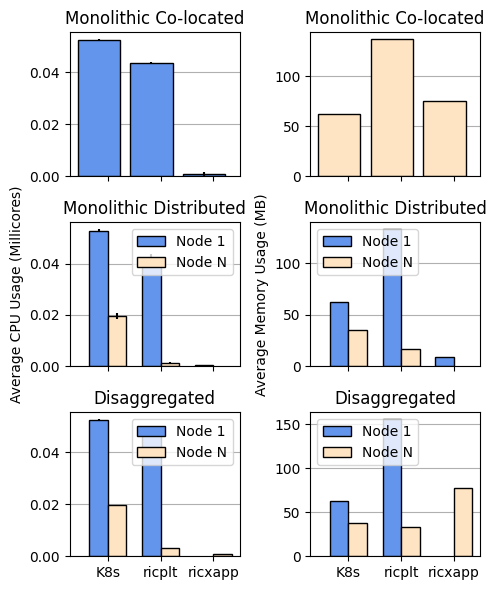

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from cycler import cycler
# Define your new color cycle
new_color_cycle = ['#6495ED', '#FFE4C4','#C0C0C0']  # List of colors, one for each bar
# Set the new color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=new_color_cycle)

# Creating a DataFrame
df_MC = pd.DataFrame(data_MC).T

# Adjusting standard deviation for "Service Ricxapp" to not plot negative values
df_MC['adjusted_stddev_cpu'] = df_MC.apply(
    lambda row: min(row['stddev_cpu'], row['avg_cpu']) if row.name == 'ricxapp' else row['stddev_cpu'],
    axis=1
)

# Creating two subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 6), sharex=True)

# Plot for CPU
axes[0,0].bar(df_MC.index, df_MC['avg_cpu'], yerr=df_MC['adjusted_stddev_cpu'], edgecolor='black', label='Avg CPU')
axes[0,0].set_title('Monolithic Co-located')
#axes[0,0].bar(df_MC.index, df_MC['avg_cpu'], yerr=df_MC['stddev_cpu'], edgecolor='black', label='Avg CPU')
#axes[0,0].set_title('Monolithic Co-located ')

# Plot for Memory
axes[0,1].bar(df_MC.index, df_MC['avg_mem'],edgecolor='black',color='#FFE4C4', label='Avg Memory')
axes[0,1].set_title('Monolithic Co-located')

df_MD = pd.DataFrame(data_MD).T
# Width of the bars
bar_width = 0.35
# Creating indices for the bar groups
index = range(len(df_MD))

# CPU Plot
# Bars for Node1 CPU
axes[1,0].bar(index, df_MD['avg_cpu_node1'], bar_width, yerr=df_MD['stddev_cpu_node1'], edgecolor='black', label='Node 1')
# Bars for NodeN CPU
axes[1,0].bar([i + bar_width for i in index], df_MD['avg_cpu_nodeN'], bar_width, yerr=df_MD['stddev_cpu_nodeN'],  edgecolor='black', label='Node N')
axes[1,0].set_ylabel('Average CPU Usage (Millicores)')
axes[1,0].set_title('Monolithic Distributed')
axes[1,0].set_xticks([i + bar_width / 2 for i in index])
axes[1,0].set_xticklabels(df_MD.index)
axes[1,0].legend()


# Memory Plot
# Bars for Node1 Memory
axes[1,1].bar(index, df_MD['avg_mem_node1'], bar_width, label='Node 1',edgecolor='black')
# Bars for NodeN Memory
axes[1,1].bar([i + bar_width for i in index], df_MD['avg_mem_nodeN'], bar_width, label='Node N',edgecolor='black')
axes[1,1].set_ylabel('Average Memory Usage (MB)')
axes[1,1].set_title('Monolithic Distributed')
axes[1,1].set_xticks([i + bar_width / 2 for i in index])
axes[1,1].set_xticklabels(df_MD.index)
axes[1,1].legend()

df_DIS = pd.DataFrame(data_DIS).T
bar_width = 0.35
# Creating indices for the bar groups
index = range(len(df_DIS))

# CPU Plot
# Bars for Node1 CPU
axes[2,0].bar(index, df_DIS['avg_cpu_node1'], bar_width, yerr=df_DIS['stddev_cpu_node1'], edgecolor='black', label='Node 1')
# Bars for NodeN CPU
axes[2,0].bar([i + bar_width for i in index], df_DIS['avg_cpu_nodeN'], bar_width, yerr=df_DIS['stddev_cpu_nodeN'],  edgecolor='black', label='Node N')
axes[2,0].set_title('Disaggregated')
axes[2,0].set_xticks([i + bar_width / 2 for i in index])
axes[2,0].set_xticklabels(df_DIS.index)
axes[2,0].legend()

# Memory Plot
# Bars for Node1 Memory
axes[2,1].bar(index, df_DIS['avg_mem_node1'], bar_width, edgecolor='black', label='Node 1')
# Bars for NodeN Memory
axes[2,1].bar([i + bar_width for i in index], df_DIS['avg_mem_nodeN'], bar_width, edgecolor='black', label='Node N')
axes[2,1].set_title('Disaggregated')
axes[2,1].set_xticks([i + bar_width / 2 for i in index])
axes[2,1].set_xticklabels(df_DIS.index)
axes[2,1].legend()



# Adjust layout and show the plots
# Setting grid and axis properties for all axes
# Setting grid and axis properties for all axes in the 2D array
for ax_row in axes:
    for ax in ax_row:
        ax.yaxis.grid(True)  # Enable horizontal grid
        ax.xaxis.grid(False) # Disable vertical grid
        ax.set_axisbelow(True) # Set grid below the bars
fig.tight_layout()
plt.savefig('out/nodes-resources.pdf', bbox_inches='tight')
plt.savefig('out/nodes-resources.png', dpi=300, bbox_inches='tight')
plt.show()
